# Common Plots

## Introduction

In this chapter, we'll look at some of the most common plots that you might want to make--and how to create them using the most popular data visualisations libraries, including [**matplotlib**](https://matplotlib.org/), [**plotnine**](https://plotnine.readthedocs.io/en/stable/), [**seaborn**](https://seaborn.pydata.org/), [**altair**](https://altair-viz.github.io/), and [**plotly**](https://plotly.com/python/). If you need an introduction to these libraries, see the previous chapter.
 
This chapter has benefited from [**viztech**](https://github.com/cstorm125/viztech), a repository that aims to recreate the entire Financial Times Visual Vocabulary using **plotnine**, from the **plotnine** documentation, from the **matplotlib** documentation, from the **seaborn** documentation, from the **altair** documentation, from the **plotly** documentation, and from examples posted around the web on forums and in blog posts. It's also worth noting that I'm more of an expert in **matplotlib** than anything else--I would really welcome contributions in the form of plots with particular libraries that I have not been able to find or implement myself.

Bear in mind that for many of the **matplotlib** examples, using the `df.plot.*` syntax can get the plot you want more quickly! To be more comprehensive, the solution for any kind of data is shown in the examples below.

Throughout, we'll assume that the data are in a tidy format (one row per observation, one variable per column). Remember that all Altair plots can be made interactive by adding `.interactive()` at the end.

First, though, let's import the libraries we'll need.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
import altair as alt
import plotly.express as px
from vega_datasets import data
import os
from pathlib import Path

# Set seed for reproducibility
np.random.seed(10)
# Set max rows displayed for readability
pd.set_option("display.max_rows", 6)
# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)

## Scatter plot

In this example, we will see a simple scatter plot with several categories using the "cars" data:

In [ ]:
cars = data.cars()
cars.head()

### Matplotlib

In [ ]:
fig, ax = plt.subplots()
for origin in cars["Origin"].unique():
    cars_sub = cars[cars["Origin"] == origin]
    ax.scatter(cars_sub["Horsepower"], cars_sub["Miles_per_Gallon"], label=origin)
ax.set_ylabel("Miles per Gallon")
ax.set_xlabel("Horsepower")
ax.legend()
plt.show()

### Seaborn

In this first example, I'll also show how to tweak the labels by using the underlying matplolib `Axes` object, here called `ax`.

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=cars, x="Horsepower", y="Miles_per_Gallon", hue="Origin", ax=ax)
ax.set_ylabel("Miles per Gallon")
ax.set_xlabel("Horsepower")
plt.show()

### Plotnine

In [ ]:
(
    ggplot(cars, aes(x="Horsepower", y="Miles_per_Gallon", color="Origin"))
    + geom_point()
    + ylab("Miles per Gallon")
)

### Altair

For this first example, we'll also show how to make the altair plot interactive with movable axes and more info on mouse-hover.

In [ ]:
alt.Chart(cars).mark_circle(size=60).encode(
    x="Horsepower",
    y="Miles_per_Gallon",
    color="Origin",
    tooltip=["Name", "Origin", "Horsepower", "Miles_per_Gallon"],
).interactive()

### Plotly

Plotly is another declarative plotting library, at least sometimes (!), but one that is interactive by default.

In [ ]:
fig = px.scatter(
    cars,
    x="Horsepower",
    y="Miles_per_Gallon",
    color="Origin",
    hover_data=["Name", "Origin", "Horsepower", "Miles_per_Gallon"],
)
fig.show()

## Facets

This applies to all plots, so in some sense is common! Facets, aka panels or small multiples, are ways of showing the same chart multiple times. Let's see how to achieve them in a few of the most popular plotting libraries.

We'll use the "tips" dataset for this.

In [ ]:
df = sns.load_dataset("tips")
df.head()

### Matplotlib

There are many ways to create facets using Matplotlib, and you can get facets in any shape or sizes you like. 

The easiest way, though, is to specify the number of rows and columns. This is achieved by specifying `nrows` and `ncols` when calling `plt.subplots`. It returns an array of shape `(nrows, ncols)` of `Axes` objects. For most purposes, you'll want to flatten these to a vector before iterating over them.

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True)
flat_axes = axes.flatten()  # Not needed with 1 row or 1 col, but good to be aware of

facet_grp = list(df["day"].unique())
# This part just to get some colours from the default color cycle
cycle = axes[0]._get_lines.prop_cycler
for i, ax in enumerate(flat_axes):
    sub_df = df.loc[df["day"] == facet_grp[i]]
    ax.scatter(
        sub_df["tip"],
        sub_df["total_bill"],
        s=30,
        edgecolor="k",
        color=next(cycle)["color"],
    )
    ax.set_title(facet_grp[i])
fig.text(0.5, 0.01, "Tip", ha="center")
fig.text(0.0, 0.5, "Total bill", va="center", rotation="vertical")
plt.tight_layout()
plt.show()

Different facet sizes are possible in numerous ways. In practice, it's often better to have evenly sized facets laid out in a grid--especially each facet is of the same x and y axes. But, just to show it's possible, here's an example that gives more space to the weekend than to weekdays using the tips dataset: 

In [ ]:
# This part just to get some colours
colormap = plt.cm.Dark2

fig = plt.figure(constrained_layout=True)
ax_dict = fig.subplot_mosaic([["Thur", "Fri", "Sat", "Sat", "Sun", "Sun"]])
facet_grp = list(ax_dict.keys())
colorst = [colormap(i) for i in np.linspace(0, 0.9, len(facet_grp))]
for i, grp in enumerate(facet_grp):
    sub_df = df.loc[df["day"] == facet_grp[i]]
    ax_dict[grp].scatter(
        sub_df["tip"],
        sub_df["total_bill"],
        s=30,
        edgecolor="k",
        color=colorst[i],
    )
    ax_dict[grp].set_title(facet_grp[i])
    if grp != "Thurs":
        ax_dict[grp].set_yticklabels([])
plt.tight_layout()
fig.text(0.5, 0, "Tip", ha="center")
fig.text(0, 0.5, "Total bill", va="center", rotation="vertical")
plt.show()

As well as using lists, you can also specify the layout using an array or using text, eg

In [ ]:
axd = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    ABD
    CCD
    CC.
    """
)
kw = dict(ha="center", va="center", fontsize=60, color="darkgrey")
for k, ax in axd.items():
    ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

### Seaborn

Seaborn makes it easy to quickly create facet plots. Note the use of `col_wrap`.

In [ ]:
sns.relplot(
    data=df,
    y="total_bill",
    x="tip",
    col="day",
    hue="day",
    col_wrap=2,
    kind="scatter",
    height=3,
    aspect=1.25,
);

A nice feature of seaborn that is much more fiddly in (base) matplotlib is the ability to specify rows and columns separately: (smoker)

In [ ]:
sns.relplot(
    data=df,
    y="total_bill",
    x="tip",
    col="day",
    row="smoker",
    hue="smoker",
    kind="scatter",
    height=2.5,
    aspect=1,
);

### Plotnine

Plotnine has several ways to wrap facets but perhaps the most delightful is to specify a formula for the variations to be encoded in the facets.

In [ ]:
(
    ggplot(df, aes(x="tip", y="total_bill", color="smoker"))
    + geom_point()
    + facet_wrap(
        "~ smoker + day", nrow=2
    )  # use ~ + to add additional faceting variables
)

### Altair



In [ ]:
alt.Chart(df).mark_point().encode(
    x="tip:Q",
    y="total_bill:Q",
    color="smoker:N",
    facet=alt.Facet("day:N", columns=2),
).properties(
    width=200,
    height=100,
)

### Plotly

In [ ]:
fig = px.scatter(
    df, x="tip", y="total_bill", color="smoker", facet_row="smoker", facet_col="day"
)
fig.show()

## Connected scatter plot

A simple variation on the scatter plot designed to show an ordering, usually of time. We'll trace out a Beveridge curve based on US data.

In [ ]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2021, 1, 1)
code_dict = {
    "Vacancies": "LMJVTTUVUSA647N",
    "Unemployment": "UNRATE",
    "LabourForce": "CLF16OV",
}
list_dfs = [
    web.DataReader(value, "fred", start, end)
    .rename(columns={value: key})
    .groupby(pd.Grouper(freq="AS"))
    .mean()
    for key, value in code_dict.items()
]
df = pd.concat(list_dfs, axis=1)
df = df.assign(Vacancies=100 * df["Vacancies"] / (df["LabourForce"] * 1e3)).dropna()
df["Year"] = df.index.year
df.head()

### Matplotlib



In [ ]:
plt.close("all")
fig, ax = plt.subplots()
quivx = -df["Unemployment"].diff(-1)
quivy = -df["Vacancies"].diff(-1)
# This connects the points
ax.quiver(
    df["Unemployment"],
    df["Vacancies"],
    quivx,
    quivy,
    scale_units="xy",
    angles="xy",
    scale=1,
    width=0.006,
    alpha=0.3,
)
ax.scatter(
    df["Unemployment"],
    df["Vacancies"],
    marker="o",
    s=35,
    edgecolor="black",
    linewidth=0.2,
    alpha=0.9,
)
for j in [0, -1]:
    ax.annotate(
        df["Year"].iloc[j],
        xy=(df[["Unemployment", "Vacancies"]].iloc[j].tolist()),
        xycoords="data",
        xytext=(-20, -40),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"),
    )
ax.set_xlabel("Unemployment rate, %")
ax.set_ylabel("Vacancy rate, %")
plt.tight_layout()
plt.show()

### Plotnine

In [ ]:
g = (
    ggplot(
        df.reset_index()[["Vacancies", "Unemployment", "Year"]],
        aes(x="Unemployment", y="Vacancies"),
    )
    + geom_point(color="brown")
    + geom_path()
    + geom_label(
        aes(x=df.iloc[0, 1], y=df.iloc[0, 0]), label=df.iloc[0, -1], nudge_y=0.01
    )
    + geom_label(
        aes(x=df.iloc[-1, 1], y=df.iloc[-1, 0]), label=df.iloc[-1, -1], nudge_y=0.01
    )
)
g

## Bubble plot

This is a scatter plot where the size of the point carries an extra dimension of information.

### Matplotlib



In [ ]:
fig, ax = plt.subplots()
scat = ax.scatter(
    cars["Horsepower"], cars["Miles_per_Gallon"], s=cars["Displacement"], alpha=0.4
)
ax.set_ylabel("Miles per Gallon")
ax.set_xlabel("Horsepower")
ax.legend(
    *scat.legend_elements(prop="sizes", num=4),
    loc="upper right",
    title="Displacement",
    frameon=False,
)
plt.show()

### Seaborn



In [ ]:
sns.scatterplot(data=cars, x="Horsepower", y="Miles_per_Gallon", size="Displacement");

### Plotnine

In [ ]:
(
    ggplot(cars, aes(x="Horsepower", y="Miles_per_Gallon", size="Displacement"))
    + geom_point()
)

### Altair


In [ ]:
alt.Chart(cars).mark_circle().encode(
    x="Horsepower", y="Miles_per_Gallon", size="Displacement"
)

### Plotly

In [ ]:
# Adding a new col is easiest way to get displacement into legend with plotly:
cars["Displacement_Size"] = pd.cut(cars["Displacement"], bins=4)
fig = px.scatter(
    cars,
    x="Horsepower",
    y="Miles_per_Gallon",
    size="Displacement",
    color="Displacement_Size",
)
fig.show()

## Line plot

First, let's get some data on GDP growth:

In [ ]:
import pandas_datareader.data as web

ts_start_date = pd.to_datetime("1999-01-01")

df = pd.concat(
    [
        web.DataReader("ticker=RGDP" + x, "econdb", start=ts_start_date)
        for x in ["US", "UK"]
    ],
    axis=1,
)
df.columns = ["US", "UK"]
df.index.name = "Date"
df = 100 * df.pct_change(4)
df = pd.melt(
    df.reset_index(),
    id_vars=["Date"],
    value_vars=df.columns,
    value_name="Real GDP growth, %",
    var_name="Country",
)
df = df.set_index("Date")
df.head()

### Matplotlib

Note that **Matplotlib** prefers data to be one variable per column, in which case we could have just run

```python
fig, ax = plt.subplots()
df.plot(ax=ax)
ax.set_title('Real GDP growth, %', loc='right')
ax.yaxis.tick_right()
```

but we are working with tidy data here, so we'll do the plotting slightly differently.

In [ ]:
fig, ax = plt.subplots()
for i, country in enumerate(df["Country"].unique()):
    df_sub = df[df["Country"] == country]
    ax.plot(df_sub.index, df_sub["Real GDP growth, %"], label=country, lw=2)
ax.set_title("Real GDP growth, %", loc="right")
ax.yaxis.tick_right()
ax.spines["right"].set_visible(True)
ax.spines["left"].set_visible(False)
ax.legend(loc="lower left")
plt.show()

### Seaborn

Note that **seaborn** prefers not to work with an index value so we use `df.reset_index()` to make the 'date' index column into a regular column in the snippet below:

In [ ]:
fig, ax = plt.subplots()
y_var = "Real GDP growth, %"
sns.lineplot(x="Date", y=y_var, hue="Country", data=df.reset_index(), ax=ax)
ax.yaxis.tick_right()
ax.spines["right"].set_visible(True)
ax.spines["left"].set_visible(False)
ax.set_ylabel("")
ax.set_title(y_var)
plt.show()

### Plotnine

In [ ]:
(
    ggplot(df.reset_index(), aes(x="Date", y="Real GDP growth, %", color="Country"))
    + geom_line()
)

### Altair

In [ ]:
alt.Chart(df.reset_index()).mark_line().encode(
    x="Date:T",
    y="Real GDP growth, %",
    color="Country",
    strokeDash="Country",
)

### Plotly

In [ ]:
fig = px.line(
    df.reset_index(),
    x="Date",
    y="Real GDP growth, %",
    color="Country",
    line_dash="Country",
)
fig.show()

## Bar chart

Let's see a bar chart, using the 'barley' dataset.

In [ ]:
barley = data.barley()
barley = pd.DataFrame(barley.groupby(["site"])["yield"].sum())
barley.head()

### Matplotlib

Just remove the 'h' in `ax.barh` to get a vertical plot.

In [ ]:
fig, ax = plt.subplots()
ax.barh(barley["yield"].index, barley["yield"], 0.35)
ax.set_xlabel("Yield")
plt.show()

### Seaborn

Just switch x and y variables to get a vertical plot.

In [ ]:
sns.catplot(
    data=barley.reset_index(),
    kind="bar",
    y="site",
    x="yield",
)

### Plotnine

Just omit `coord_flip()` to get a vertical plot.

In [ ]:
(ggplot(barley.reset_index(), aes(x="site", y="yield")) + geom_col() + coord_flip())

### Altair

Just switch x and y to get a vertical plot.

In [ ]:
alt.Chart(barley.reset_index()).mark_bar().encode(y="site", x="yield",).properties(
    width=alt.Step(40)  # controls width of bar.
)

### Plotly

In [ ]:
fig = px.bar(barley.reset_index(), y="site", x="yield")
fig.show()

## Grouped bar chart



In [ ]:
barley = data.barley()
barley = pd.DataFrame(barley.groupby(["site", "year"])["yield"].sum()).reset_index()
barley.head()

### Matplotlib

In [ ]:
labels = barley["site"].unique()
y = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.barh(y - width / 2, barley.loc[barley["year"] == 1931, "yield"], width, label="1931")
ax.barh(y + width / 2, barley.loc[barley["year"] == 1932, "yield"], width, label="1932")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Yield")
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend(frameon=False)
plt.show()

### Seaborn

In [ ]:
sns.catplot(data=barley, kind="bar", y="site", x="yield", hue="year")

### Plotnine

In [ ]:
(
    ggplot(barley, aes(x="site", y="yield", fill="factor(year)"))
    + geom_col(position="dodge")
    + coord_flip()
)

### Altair


In [ ]:
alt.Chart(barley.reset_index()).mark_bar().encode(
    y="year:O", x="yield", color="year:N", row="site:N"
).properties(
    width=alt.Step(40)  # controls width of bar.
)

### Plotly

In [ ]:
px_barley = barley.reset_index()
# This prevents plotly from using a continuous scale for year
px_barley["year"] = px_barley["year"].astype("category")
fig = px.bar(px_barley, y="site", x="yield", barmode="group", color="year")
fig.show()

## Stacked bar chart



### Matplotlib 

In [ ]:
labels = barley["site"].unique()
y = np.arange(len(labels))  # the label locations
width = 0.35  # the width (or height) of the bars

fig, ax = plt.subplots()
ax.barh(y, barley.loc[barley["year"] == 1931, "yield"], width, label="1931")
ax.barh(
    y,
    barley.loc[barley["year"] == 1932, "yield"],
    width,
    label="1932",
    left=barley.loc[barley["year"] == 1931, "yield"],
)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Yield")
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend(frameon=False)
plt.show()

### Seaborn

As far as I know, there's no easy way of doing this.

### Plotnine



In [ ]:
(
    ggplot(barley, aes(x="site", y="yield", fill="factor(year)"))
    + geom_col()
    + coord_flip()
)

### Altair

In [ ]:
alt.Chart(barley.reset_index()).mark_bar().encode(
    y="site",
    x="yield",
    color="year:N",
).properties(
    width=alt.Step(40)  # controls width of bar.
)

### Plotly

In [ ]:
fig = px.bar(px_barley, y="site", x="yield", barmode="relative", color="year")
fig.show()

## Kernel density estimate

We'll use the diamonds dataset to demonstrate this.

In [ ]:
diamonds = sns.load_dataset("diamonds").sample(1000)
diamonds.head()

### Matplotlib

Technically, there is a way to do this but it's pretty inelegant if you want a quick plot. That's because **matplotlib** doesn't do the density estimation itself. [Jake Vanderplas](https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html) has a nice example but as it relies on a few extra libraries, I won't reproduce it here.

### Seaborn



In [ ]:
sns.displot(diamonds, x="carat", kind="kde", hue="cut", fill=True);

### Plotnine



In [ ]:
(ggplot(diamonds, aes(x="carat", fill="cut", colour="cut")) + geom_density(alpha=0.5))

### Altair

In [ ]:
alt.Chart(diamonds).transform_density(
    density="carat", as_=["carat", "density"], groupby=["cut"]
).mark_area(fillOpacity=0.5).encode(
    x="carat:Q",
    y="density:Q",
    color="cut:N",
)

### Plotly

In [ ]:
import plotly.figure_factory as ff

px_di = diamonds.pivot(columns="cut", values="carat")
ff.create_distplot(
    [px_di[c].dropna() for c in px_di.columns],
    group_labels=px_di.columns,
    show_rug=False,
    show_hist=False,
)

## Histogram or probability density function

For this, let's go back to the penguins dataset.

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head()

### Matplotlib

The `density=` keyword parameter decides whether to create counts or a probability density function.

In [ ]:
fig, ax = plt.subplots()
ax.hist(penguins["flipper_length_mm"], bins=30, density=True, edgecolor="k")
ax.set_xlabel("Flipper length (mm)")
ax.set_ylabel("Probability density")
fig.tight_layout()
plt.show()

### Seaborn

In [ ]:
sns.histplot(data=penguins, x="flipper_length_mm", bins=30, stat="density");

### Plotnine



In [ ]:
(
    ggplot(penguins, aes(x="flipper_length_mm", y="stat(density)"))
    + geom_histogram(bins=30)  # specify the binwidth
)

### Altair



In [ ]:
alt.Chart(penguins).mark_bar().encode(
    alt.X("flipper_length_mm:Q", bin=True),
    y="count()",
)

### Plotly



In [ ]:
fig = px.histogram(penguins, x="flipper_length_mm", nbins=30)
fig.show()

## Marginal histograms



### Maplotlib

[Jaker Vanderplas's excellent notes](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html) have a great example of this, but now there's an easier way to do it with Matplotlib's new `constrained_layout` options.

In [ ]:
fig = plt.figure(constrained_layout=True)
# Create a layout with 3 panels in the given ratios
axes_dict = fig.subplot_mosaic(
    [[".", "histx"], ["histy", "scat"]],
    gridspec_kw={"width_ratios": [1, 7], "height_ratios": [2, 7]},
)
# Glue all the relevant axes together
axes_dict["histy"].invert_xaxis()
axes_dict["histx"].sharex(axes_dict["scat"])
axes_dict["histy"].sharey(axes_dict["scat"])
# Plot the data
axes_dict["scat"].scatter(penguins["bill_length_mm"], penguins["bill_depth_mm"])
axes_dict["histx"].hist(penguins["bill_length_mm"])
axes_dict["histy"].hist(penguins["bill_depth_mm"], orientation="horizontal");

### Seaborn

In [ ]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm");

### Plotnine

I couldn't find an easy way to do this in plotnine but you can make rug plots, which have some similarities in terms of information conveyed.

In [ ]:
(
    ggplot(penguins, aes(x="bill_length_mm", y="bill_depth_mm"))
    + geom_point()
    + geom_rug()
)

### Altair

This is a bit fiddly.

In [ ]:
base = alt.Chart(penguins)

xscale = alt.Scale(domain=(20, 60))
yscale = alt.Scale(domain=(10, 30))

area_args = {"opacity": 0.5, "interpolate": "step"}

points = base.mark_circle().encode(
    alt.X("bill_length_mm", scale=xscale), alt.Y("bill_depth_mm", scale=yscale)
)

top_hist = (
    base.mark_area(**area_args)
    .encode(
        alt.X(
            "bill_length_mm:Q",
            # when using bins, the axis scale is set through
            # the bin extent, so we do not specify the scale here
            # (which would be ignored anyway)
            bin=alt.Bin(maxbins=30, extent=xscale.domain),
            stack=None,
            title="",
        ),
        alt.Y("count()", stack=None, title=""),
    )
    .properties(height=60)
)

right_hist = (
    base.mark_area(**area_args)
    .encode(
        alt.Y(
            "bill_depth_mm:Q",
            bin=alt.Bin(maxbins=30, extent=yscale.domain),
            stack=None,
            title="",
        ),
        alt.X("count()", stack=None, title=""),
    )
    .properties(width=60)
)

top_hist & (points | right_hist)

### Plotly



In [ ]:
fig = px.scatter(
    penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    marginal_x="histogram",
    marginal_y="histogram",
)
fig.show()

## Heatmap

Heatmaps, or sometimes known as correlation maps, represent data in 3 dimensions by having two axes that forms a grid showing colour that corresponds to (usually) continuous values.

We'll use the flights data to show the number of passengers by month-year:

In [3]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers").T
flights.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


### Matplotlib



In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(flights.values, cmap="inferno")
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(flights.columns)))
ax.set_yticks(np.arange(len(flights.index)))
# Labels
ax.set_xticklabels(flights.columns, rotation=90)
ax.set_yticklabels(flights.index)
plt.show()

### Seaborn

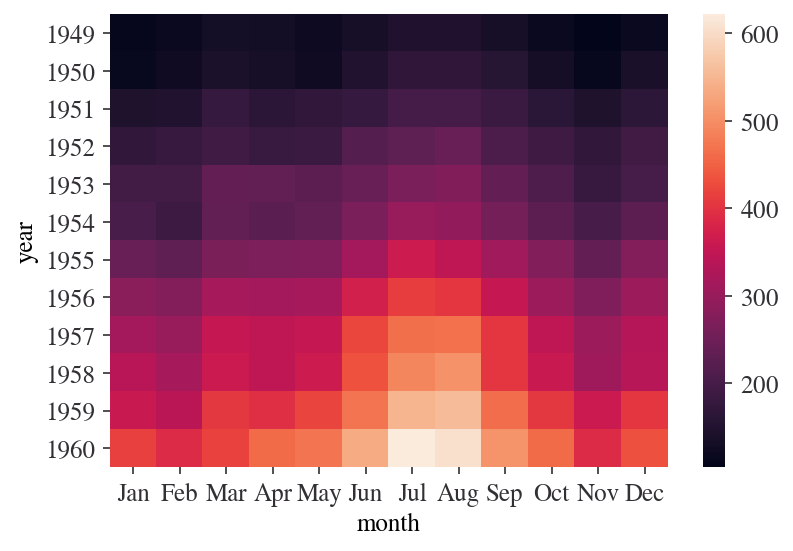

In [4]:
sns.heatmap(flights);

### Plotnine

Plotnine uses tidy data, rather than the wide data preferred by **matplotlib**, so we need to first get the original format of the flights data back:

In [ ]:
flights = sns.load_dataset("flights")
(
    ggplot(flights, aes("month", "factor(year)", fill="passengers"))
    + geom_tile()
    + scale_y_reverse()
)

### Altair

In [ ]:
alt.Chart(flights).mark_rect().encode(
    x=alt.X("month", type="nominal", sort=None), y="year:O", color="passengers:Q"
)

### Plotly



In [5]:
fig = px.imshow(flights.values, labels=dict(x="Month", y="Year", color="Number"),
                x=flights.columns,
                y=flights.index)
fig.show()

## Boxplot

Let's use the tips dataset:

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

### Matplotlib

There isn't a very direct way to create multiple box plots of different data in matplotlib in the case where the groups are unbalanced, so we create several different boxplot objects.


In [ ]:
colormap = plt.cm.Set1
colorst = [colormap(i) for i in np.linspace(0, 0.9, len(tips["time"].unique()))]

fig, ax = plt.subplots()
for i, grp in enumerate(tips["time"].unique()):
    bplot = ax.boxplot(
        tips.loc[tips["time"] == grp, "tip"],
        positions=[i],
        vert=True,  # vertical box alignment
        patch_artist=True,  # fill with color
        labels=[grp],
    )  # X label
    for patch in bplot["boxes"]:
        patch.set_facecolor(colorst[i])

ax.set_ylabel("Tip")
plt.show()

### Seaborn


In [ ]:
sns.boxplot(y=tips["tip"], x=tips["time"]);

### Plotnine



In [ ]:
(ggplot(tips) + geom_boxplot(aes(y="tip", x="time", fill="time")))

### Altair

In [ ]:
alt.Chart(tips).mark_boxplot(size=50).encode(
    x="time:N", y="tip:Q", color="time:N"
).properties(width=300)

### Plotly



In [ ]:
fig = px.box(tips, x="time", y="tip", color="time")
fig.show()

## Violin plot

We'll use the same data as before, the tips dataset.

### Matplotlib

In [ ]:
colormap = plt.cm.Set1
colorst = [colormap(i) for i in np.linspace(0, 0.9, len(tips["time"].unique()))]

fig, ax = plt.subplots()
for i, grp in enumerate(tips["time"].unique()):
    vplot = ax.violinplot(
        tips.loc[tips["time"] == grp, "tip"], positions=[i], vert=True
    )
labels = list(tips["time"].unique())
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_ylabel("Tip")
plt.show()

### Seaborn

In [ ]:
sns.violinplot(y=tips["tip"], x=tips["time"]);

### Plotnine

In [ ]:
(ggplot(tips, aes(x="time", y="tip", fill="time")) + geom_violin())

### Altair

In [ ]:
alt.Chart(tips).transform_density(
    "tip", as_=["tip", "density"], groupby=["time"]
).mark_area(orient="horizontal").encode(
    y="tip:Q",
    color="time:N",
    x=alt.X(
        "density:Q",
        stack="center",
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0], grid=False, ticks=True),
    ),
    column=alt.Column(
        "time:N",
        header=alt.Header(
            titleOrient="bottom",
            labelOrient="bottom",
            labelPadding=0,
        ),
    ),
).properties(
    width=100
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

### Plotly

In [ ]:
fig = px.violin(
    tips,
    y="tip",
    x="time",
    color="time",
    box=True,
    points="all",
    hover_data=tips.columns,
)
fig.show()

## Lollipop

In [ ]:
df = sns.load_dataset("planets").groupby("year")["number"].count()
df.head()

### Matplotlib


In [ ]:
fig, ax = plt.subplots()
ax.stem(df.index, df)
ax.yaxis.tick_right()
ax.spines["left"].set_visible(False)
ax.set_ylim(0, 200)
ax.set_title("Number of exoplanets discovered per year")
plt.show()

### Plotnine

In [ ]:
(
    ggplot(df.reset_index(), aes(x="year", y="number"))
    + geom_point()
    + geom_segment(aes(x="year", xend="year", y=0, yend="number"))
    + ggtitle("Number of exoplanets discovered per year")
)

### Plotly

In [ ]:
import plotly.graph_objects as go

px_df = df.reset_index()

fig1 = go.Figure()
# Draw points
fig1.add_trace(
    go.Scatter(
        x=px_df["year"],
        y=px_df["number"],
        mode="markers",
        marker_color="darkblue",
        marker_size=10,
    )
)
# Draw lines
for index, row in px_df.iterrows():
    fig1.add_shape(type="line", x0=row["year"], y0=0, x1=row["year"], y1=row["number"])
fig1.show()

## Overlapping Area plot

For this, let's look at the dominance of the three most used methods for detecting exoplanets.

In [ ]:
df = sns.load_dataset("planets")
most_pop_methods = (
    df.groupby(["method"])["number"].sum().sort_values(ascending=False).index[:3].values
)
df = df[df["method"].isin(most_pop_methods)]
df.head()

### Matplotlib

The easiest way to do this in matplotlib is to adjust the data a bit first and then use the built-in **pandas** plot function. (This is true in other cases too, but in this case it's much more complex otherwise).

In [ ]:
(
    df.groupby(["year", "method"])["number"]
    .sum()
    .unstack()
    .plot.area(alpha=0.6, ylim=(0, None))
    .set_title("Planets dicovered by top 3 methods", loc="left")
);

### Seaborn

I couldn't find an option for this.

### Plotnine



In [ ]:
(
    ggplot(
        df.groupby(["year", "method"])["number"].sum().reset_index(),
        aes(x="year", y="number", fill="method", order="method"),
    )
    + geom_area(alpha=0.5)
)

### Altair


In [ ]:
alt.Chart(
    df.groupby(["year", "method"])["number"]
    .sum()
    .reset_index()
    .assign(
        year=lambda x: pd.to_datetime(x["year"], format="%Y")
        + pd.tseries.offsets.YearEnd()
    )
).mark_area().encode(x="year:T", y="number:Q", color="method:N")

## Slope chart

A slope chart has two points connected by a line and is good for indicating how relationships between variables have changed over time.

In [8]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv"
)
df = pd.melt(
    df,
    id_vars=["continent"],
    value_vars=df.columns[1:],
    value_name="GDP per capita",
    var_name="Year",
).rename(columns={"continent": "Continent"})
df.head()

,Continent,Year,GDP per capita
0,Africa,1952,1252.572466
1,Americas,1952,4079.062552
2,Asia,1952,5195.484004
3,Europe,1952,5661.057435
4,Oceania,1952,10298.085650


### Matplotlib

There isn't an off-the-shelf way to do this in matplotlib but the example below shows that, with matplotlib, where there's a will there's a way! It's where the 'build-what-you-want' comes into its own. Note that the functino that's defined returns an `Axes` object so that you can do further processing and tweaking as you like.

In [ ]:
from matplotlib import lines as mlines


def slope_plot(data, x, y, group, before_txt="Before", after_txt="After"):
    if len(data[x].unique()) != 2:
        raise ValueError("Slope plot must have two unique periods.")
    wide_data = data[[x, y, group]].pivot(index=group, columns=x, values=y)
    x_names = list(wide_data.columns)
    klass = [
        "red" if (y1 - y2) < 0 else "green"
        for y1, y2 in zip(wide_data[x_names[0]], wide_data[x_names[1]])
    ]
    fig, ax = plt.subplots()

    def newline(p1, p2, color="black"):
        ax = plt.gca()
        l = mlines.Line2D(
            [p1[0], p2[0]],
            [p1[1], p2[1]],
            color="red" if p1[1] - p2[1] > 0 else "green",
            marker="o",
            markersize=6,
        )
        ax.add_line(l)
        return l

    # Vertical Lines
    y_min = data[y].min()
    y_max = data[y].max()
    ax.vlines(
        x=1,
        ymin=y_min,
        ymax=y_max,
        color="black",
        alpha=0.7,
        linewidth=1,
        linestyles="dotted",
    )
    ax.vlines(
        x=3,
        ymin=y_min,
        ymax=y_max,
        color="black",
        alpha=0.7,
        linewidth=1,
        linestyles="dotted",
    )
    # Points
    ax.scatter(
        y=wide_data[x_names[0]],
        x=np.repeat(1, wide_data.shape[0]),
        s=15,
        color="black",
        alpha=0.7,
    )
    ax.scatter(
        y=wide_data[x_names[1]],
        x=np.repeat(3, wide_data.shape[0]),
        s=15,
        color="black",
        alpha=0.7,
    )
    # Line Segmentsand Annotation
    for p1, p2, c in zip(wide_data[x_names[0]], wide_data[x_names[1]], wide_data.index):
        newline([1, p1], [3, p2])
        ax.text(
            1 - 0.05,
            p1,
            c,
            horizontalalignment="right",
            verticalalignment="center",
            fontdict={"size": 14},
        )
        ax.text(
            3 + 0.05,
            p2,
            c,
            horizontalalignment="left",
            verticalalignment="center",
            fontdict={"size": 14},
        )
    # 'Before' and 'After' Annotations
    ax.text(
        1 - 0.05,
        y_max + abs(y_max) * 0.1,
        before_txt,
        horizontalalignment="right",
        verticalalignment="center",
        fontdict={"size": 16, "weight": 700},
    )
    ax.text(
        3 + 0.05,
        y_max + abs(y_max) * 0.1,
        after_txt,
        horizontalalignment="left",
        verticalalignment="center",
        fontdict={"size": 16, "weight": 700},
    )
    # Decoration
    ax.set(
        xlim=(0, 4), ylabel=y, ylim=(y_min - 0.1 * abs(y_min), y_max + abs(y_max) * 0.1)
    )
    ax.set_xticks([1, 3])
    ax.set_xticklabels(x_names)
    # Lighten borders
    for ax_pos in ["top", "bottom", "right", "left"]:
        ax.spines[ax_pos].set_visible(False)
    return ax


slope_plot(df, x="Year", y="GDP per capita", group="Continent");

### Seaborn

In [ ]:
sns.pointplot(x="Year", y="GDP per capita", hue="Continent", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0);

### Plotnine

In [ ]:
(
    ggplot(df, aes(x="Year", y="GDP per capita", group="Continent"))
    + geom_line(aes(color="Continent", alpha=1), size=2)
    + geom_point(aes(color="Continent", alpha=1), size=4)
)

### Altair

In [ ]:
alt.Chart(df).mark_line().encode(x="Year:O", y="GDP per capita", color="Continent")

### Plotly

In [13]:
import plotly.graph_objects as go

yr_names = [int(x) for x in df["Year"].unique()]
px_df = (
    df.pivot(index="Continent", columns="Year", values="GDP per capita")
    .reset_index()
    .rename(columns=dict(zip(df["Year"].unique(), range(len(df["Year"].unique())))))
)

x_offset = 5

fig1 = go.Figure()
# Draw lines
for index, row in px_df.iterrows():
    fig1.add_shape(
        type="line",
        x0=yr_names[0],
        y0=row[0],
        x1=yr_names[1],
        y1=row[1],
        name=row["Continent"],
        line=dict(color=px.colors.qualitative.Plotly[index]),
    )
    fig1.add_trace(
        go.Scatter(
            x=[yr_names[0]],
            y=[row[0]],
            text=row["Continent"],
            mode="text",
            name=None,
        )
    )


fig1.update_xaxes(range=[yr_names[0] - x_offset, yr_names[1] + x_offset])
fig1.update_yaxes(
    range=[px_df[[0, 1]].min().min() * 0.8, px_df[[0, 1]].max().max() * 1.2]
)
fig1.update_layout(showlegend=False)
fig1.show()

## Dumbbell Plot

These are excellent for showing a change in time with a large number of categories, as we will do here with continents and mean GDP per capita.

In [ ]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv"
)
df = pd.melt(
    df,
    id_vars=["continent"],
    value_vars=df.columns[1:],
    value_name="GDP per capita",
    var_name="Year",
).rename(columns={"continent": "Continent"})
df.head()

### Matplotlib

Again, no off-the-shelf method--but that's no problem when you can build it yourself.

In [ ]:
from matplotlib import lines as mlines


def dumbbell_plot(data, x, y, change):
    if len(data[x].unique()) != 2:
        raise ValueError("Dumbbell plot must have two unique periods.")
    if type(data[y].iloc[0]) != str:
        raise ValueError("Dumbbell plot y variable only works with category values.")
    wide_data = data[[x, y, change]].pivot(index=y, columns=x, values=change)
    x_names = list(wide_data.columns)
    y_names = list(wide_data.index)

    def newline(p1, p2, color="black"):
        ax = plt.gca()
        l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]], color="skyblue", zorder=0)
        ax.add_line(l)
        return l

    fig, ax = plt.subplots()
    # Points
    ax.scatter(
        y=range(len(y_names)),
        x=wide_data[x_names[1]],
        s=50,
        color="#0e668b",
        alpha=0.9,
        zorder=2,
        label=x_names[1],
    )
    ax.scatter(
        y=range(len(y_names)),
        x=wide_data[x_names[0]],
        s=50,
        color="#a3c4dc",
        alpha=0.9,
        zorder=1,
        label=x_names[0],
    )
    # Line segments
    for i, p1, p2 in zip(
        range(len(y_names)), wide_data[x_names[0]], wide_data[x_names[1]]
    ):
        newline([p1, i], [p2, i])
    ax.set_yticks(range(len(y_names)))
    ax.set_yticklabels(y_names)
    # Decoration
    # Lighten borders
    for ax_pos in ["top", "right", "left"]:
        ax.spines[ax_pos].set_visible(False)
    ax.set_xlabel(change)
    ax.legend(frameon=False, loc="lower right")
    plt.show()


dumbbell_plot(df, x="Year", y="Continent", change="GDP per capita")

### Plotly

In [ ]:
import plotly.graph_objects as go

fig1 = go.Figure()

yr_names = df["Year"].unique()


# Draw lines
for i, cont in enumerate(df["Continent"].unique()):
    cdf = df[df["Continent"] == cont]
    fig1.add_shape(
        type="line",
        x0=cdf.loc[cdf["Year"] == yr_names[0], "GDP per capita"].values[0],
        y0=cont,
        x1=cdf.loc[cdf["Year"] == yr_names[1], "GDP per capita"].values[0],
        y1=cont,
        line=dict(color=px.colors.qualitative.Plotly[0], width=2),
    )
# Draw points
for i, year in enumerate(yr_names):
    yrdf = df[df["Year"] == year]
    fig1.add_trace(
        go.Scatter(
            y=yrdf["Continent"],
            x=yrdf["GDP per capita"],
            mode="markers",
            name=year,
            marker_color=px.colors.qualitative.Plotly[i],
            marker_size=10,
        ),
    )

fig1.show()

## Polar

I'm not sure I've ever seen a polar plots in economics, but you never know.

Let's generate some polar data first:


In [ ]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r
polar_data = pd.DataFrame({"r": r, "theta": theta})
polar_data.head()

### Matplotlib


In [ ]:
ax = plt.subplot(111, projection="polar")
ax.plot(polar_data["theta"], polar_data["r"])
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Fewer radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
plt.show()

### Seaborn



In [ ]:
ax = plt.subplot(111, projection="polar")
sns.lineplot(polar_data["theta"], polar_data["r"], ax=ax);

In [ ]:
polar_data

### Plotly

In [ ]:
fig = go.Figure(
    data=go.Scatterpolar(
        r=polar_data["r"].values,
        theta=polar_data["theta"].values * 180 / (np.pi),
        mode="lines",
    )
)

fig.update_layout(showlegend=False)
fig.show()

## Radar (or spider) chart

Let's generate some synthetic data for this one. Assumes that result to be shown is the sum of observations.

In [ ]:
df = pd.DataFrame(
    dict(
        zip(
            ["var" + str(i) for i in range(1, 6)],
            [np.random.randint(30, size=(4)) for i in range(1, 6)],
        )
    )
)
df.head()

In [ ]:
from math import pi


def radar_plot(data, variables):
    n_vars = len(variables)
    # Plot the first line of the data frame.
    # Repeat the first value to close the circular graph:
    values = data.loc[data.index[0], variables].values.flatten().tolist()
    values += values[:1]
    # What will be the angle of each axis in the plot? (we divide / number of variable)
    angles = [n / float(n_vars) * 2 * pi for n in range(n_vars)]
    angles += angles[:1]
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], variables)
    # Draw ylabels
    ax.set_rlabel_position(0)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle="solid")
    # Fill area
    ax.fill(angles, values, "b", alpha=0.1)
    return ax


radar_plot(df, df.columns);

### Plotly

In [ ]:
df = px.data.wind()
print(df.head())
fig = px.line_polar(
    df,
    r="frequency",
    theta="direction",
    color="strength",
    line_close=True,
    color_discrete_sequence=px.colors.sequential.Plasma_r,
    template="plotly_dark",
)
fig.show()

## Wordcloud

These should be used sparingly. Let's grab part of a famous text from Project Gutenberg:

In [ ]:
# To run this example, download smith_won.txt from
# https://github.com/aeturrell/coding-for-economists/blob/main/data/smith_won.txt
# and put it in a sub-folder called 'data

book_text = open(Path("data", "smith_won.txt"), "r").read()
# Print some lines
print("\n".join(book_text.split(os.linesep)[107:117]))

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=700, height=400).generate(book_text)
fig, ax = plt.subplots(facecolor="k")
ax.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout();

We can also create a 'mask' for the wordcloud to shape it how we like, here in the shape of a book.

In [ ]:
# To run this example, download book_mask.png from
# https://github.com/aeturrell/coding-for-economists/raw/main/data/book_mask.png
# and put it in a sub-folder called 'data
from PIL import Image

mask = np.array(Image.open(Path("data", "book_mask.png")))
wc = WordCloud(width=700, height=400, mask=mask, background_color="white")
wordcloud = wc.generate(book_text)
fig, ax = plt.subplots(facecolor="white")
ax.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout();

## Network diagrams

### networkx

The most well-established network visualisation package is [**networkx**](https://networkx.org/documentation/stable/index.html), which does a *lot* more than just visualisation. It has many different positioning options for rendering any given network, for instance in circular, spectral, spring, Fruchterman-Reingold, or other styles. In the below example, we use a **pandas** dataframe to specify the edges in two columns but there are various other ways to specify the network too, including ones that do not rely on **pandas**.

The underlying plot is rendered with **matplotlib**, meaning that you can customise it further should you need to. You can pass an `Axes` object `ax` to `nx.draw` using `nx.draw(..., ax=ax)`.

In [ ]:
import networkx as nx

df = pd.DataFrame(
    {
        "source": ["A", "B", "C", "A", "E", "F", "E", "G", "G", "D", "F"],
        "target": ["D", "A", "E", "C", "A", "F", "G", "D", "B", "G", "C"],
    }
)
G = nx.from_pandas_edgelist(df)
nx.draw(G, with_labels=True, node_size=500, node_color="skyblue")

### Altair

Thanks to [Juan Mateos Garcia](https://juan-mateos.github.io/), we have a way of doing this in **altair** too. (I highly recommend you [follow Juan](https://twitter.com/JMateosGarcia) on twitter for all things data science and innovation.)

Now bear with me, because the code is going to be quite long as there's a bit of setting up to do. But once we have set up the functions they can be used again for arbitrary networks, ie the code is not specific to the network we're going to look at. Everything was written by Juan, and his original code can be found [here](https://gist.github.com/Juan-Mateos/e1e274652c6247bf2114a463b73bd2d7).

In [ ]:
def node_layer(
    node_df,
    graph,
    node_label_lookup,
    node_label,
    node_size,
    node_color,
    show_neighbours,
):
    """Creates node_layer in the plot"""
    node_chart = (
        alt.Chart(node_df)
        .mark_point(filled=True, stroke="black", strokeWidth=0.5)
        .encode(
            x=alt.X("x", axis=None), y=alt.Y("y", axis=None), fillOpacity=alt.value(1)
        )
    )

    if node_size in node_df.columns:
        node_chart = node_chart.encode(
            size=alt.Size(node_size, legend=alt.Legend(orient="bottom"))
        )

    if node_color in node_df.columns:
        node_chart = node_chart.encode(
            color=alt.Color(
                node_color,
                legend=alt.Legend(columns=2),
                scale=alt.Scale(scheme="Spectral"),
            )
        )
    if show_neighbours is True:
        neighbors = {
            node: ", ".join(
                [str(node_label_lookup[n]) for n in nx.neighbors(graph, node)]
            )
            for node in graph.nodes()
        }
        node_df["neighbors"] = node_df["node"].map(neighbors)

        node_chart = node_chart.encode(tooltip=[node_label, "neighbors"])
    else:
        node_chart = node_chart.encode(tooltip=[node_label])

    return node_chart


def calculate_edge_positions(graph, node_pos_lookup, edge_scale):
    """Calculates the positions of the edges"""
    if len(nx.get_edge_attributes(graph, "weight")) > 0:
        weighted = True
        edges_df = pd.DataFrame(
            [
                {"e1": e[0], "e2": e[1], "weight": e[2]["weight"]}
                for e in list(graph.edges(data=True))
            ]
        )
    else:
        weighted = False
        edges_df = pd.DataFrame(
            [
                {"e1": e[0], "e2": e[1], "weight": 1}
                for e in list(graph.edges(data=True))
            ]
        )

    edge_pos_cont = []

    for _id, r in edges_df.iterrows():
        x1, y1 = [node_pos_lookup[r["e1"]][n] for n in [0, 1]]
        x2, y2 = [node_pos_lookup[r["e2"]][n] for n in [0, 1]]
        w = int(r["weight"]) / edge_scale
        edge_pos_cont.append(
            pd.Series([x1, y1, x2, y2, w], index=["x1", "y1", "x2", "y2", "weight"])
        )

    edges_pos_df = pd.DataFrame(edge_pos_cont)
    return edges_pos_df, weighted


def edge_layer(edges_pos_df, weighted, edge_opacity):
    """Creates edge layer in the plot"""
    edge_chart = (
        alt.Chart(edges_pos_df)
        .mark_line()
        .encode(x="x1", x2="x2", y="y1", y2="y2", strokeOpacity=alt.value(edge_opacity))
    )
    if weighted is True:
        edge_chart = edge_chart.encode(
            strokeWidth=alt.StrokeWidth("weight", legend=alt.Legend(orient="bottom"))
        )
    return edge_chart


def plot_altair_network(
    node_df,
    graph,
    node_label=None,
    node_size=None,
    node_color=None,
    show_neighbours=True,
    edge_scale=1,
    edge_opacity=0.1,
):
    """Plot a network graph with altair
    Args:
        node_df (df): dataframe where the rows are nodes and the
        node_label (str): node label variable in node_df
        node_size (str): node size variable in node_df
        node_color (str): node color variable (this is a categorical variable)
        columns are relevant variables including node position, node_label, node_size,node_color
        graph (networkx graph): graph object generated with networkx that we use to extract edges & edgeWidths
        show_neighbours (bool): if we want neighbours to be extracted and showed in a tooltip
        edge_scale (float): scale for weight value
        edge_opacity (float): weight opacity
    """

    # Node chart
    node_df_ = node_df.copy()

    # Make node name - label lookup
    node_label_lookup = node_df_.set_index("node")["node_name"].to_dict()
    node_pos_lookup = {r["node"]: (r["x"], r["y"]) for _id, r in node_df_.iterrows()}

    # Plot nodes
    node_plot = node_layer(
        node_df_,
        graph,
        node_label_lookup,
        node_label,
        node_size,
        node_color,
        show_neighbours,
    )
    # Plot edges (after calculating their positions)
    edge_positions, weighted = calculate_edge_positions(
        graph, node_pos_lookup, edge_scale
    )

    edge_plot = edge_layer(edge_positions, weighted, edge_opacity)

    # Combine plots

    net_plot = (
        (node_plot + edge_plot).configure_axis(grid=False).configure_view(strokeWidth=0)
    )
    return net_plot


##########
# Example
##########

# Read network
m = nx.les_miserables_graph()

# Extract node positions
m_pos = nx.kamada_kawai_layout(m)

# Create node df (inelegantly)
node_df = (
    pd.DataFrame(m_pos)
    .T.rename(columns={0: "x", 1: "y"})
    .reset_index(drop=False)
    .rename(columns={"index": "node"})
    .assign(node_name=lambda x: x["node"])
)

# Plot
plot_altair_network(
    node_df,
    node_label="node_name",
    node_size=None,
    node_color=None,
    graph=m,
    show_neighbours=True,
)

## Ridge, or 'joy', plots

These are famous from the front cover of “Unkown Pleasures” by Joy Division. Although **seaborn** can be coaxed into plotting ridge plots, by far the easiest way is via the [**joypy**](https://github.com/sbebo/joypy) package. These plots sometimes seem to prioritise form over function. In this case, let's look at an example where I think they do add value: showing the global increase in temperature.

We'll use a summary of the daily land-surface average temperature anomaly produced by the Berkeley Earth averaging method. Temperatures are in Celsius and reported as anomalies relative to the Jan 1951-Dec 1980 average (the estimated Jan 1951-Dec 1980 land-average temperature is 8.63 +/- 0.06 C).

In [ ]:
# To run this example, download the pickle file from
# https://github.com/aeturrell/coding-for-economists/blob/main/data/berkeley_data.pkl
# and put it in a sub-folder called 'data'
df = pd.read_pickle(Path("data/berkeley_data.pkl"))
df.head()

In [ ]:
import joypy
from matplotlib import cm

final_year = df["Year"].max()
first_year = df["Year"].min()

labels = [y if y % 10 == 0 else None for y in list(df.Year.unique())]
fig, axes = joypy.joyplot(
    df,
    by="Year",
    column="Anomaly",
    labels=labels,
    range_style="own",
    grid="y",
    linewidth=1,
    legend=False,
    title=f"Global daily temperature anomaly {first_year}-{final_year} \n(°C above 1951-80 average)",
    colormap=cm.inferno,
)

## Waterfall chart

Waterfall charts are good for showing how different contributions combine to net out at a certain value. There's a package dedicated to them called [**waterfallcharts**](https://github.com/chrispaulca/waterfall). It builds on **matplotlib**. First, let's create some data:

In [ ]:
a = ["sales", "returns", "credit fees", "rebates", "late charges", "shipping"]
b = [10, -30, -7.5, -25, 95, -7]

Now let's plot this data. Because the defaults of **waterfallcharts** don't play that nicely with the plot style used for this book, we'll temporarily switch back to the **matplotlib** default plot style using a *context* and `with` statement:

In [ ]:
import waterfall_chart

with plt.style.context("default"):
    plot = waterfall_chart.plot(a, b, sorted_value=True, rotation_value=0)

### Plotly



In [ ]:
import plotly.graph_objects as go

px_b = b + [sum(b)]

fig = go.Figure(
    go.Waterfall(
        name="20",
        orientation="v",
        measure=["relative"] * len(a) + ["total"],
        x=a + ["net"],
        textposition="outside",
        text=[str(x) for x in b] + ["net"],
        y=px_b,
        connector={"line": {"color": "rgb(63, 63, 63)"}},
    )
)

fig.show()

## Venn

Venn diagrams show the overlap between groups. As with some of these other, more unsual chart types, there's a special package that produces these and which builds on **matplotlib**.

In [ ]:
from matplotlib_venn import venn2

venn2(subsets=(10, 5, 2), set_labels=("Group A", "Group B"), alpha=0.5)
plt.show()

## Priestly Timeline

This displays a timeline of start and end events in time, and their overlap.

In [ ]:
df = (
    pd.read_csv(
        "https://github.com/aeturrell/coding-for-economists/raw/main/data/priestley-timeline.csv"
    )
    .melt(id_vars="Name", value_name="Date")
    .assign(Date=lambda x: pd.to_datetime(x["Date"]))
)
df

### Plotnine

This example is from [**viztech**](https://github.com/cstorm125/viztech). It relies on an extra package for axes scaling and formatting called [**mizani**](https://mizani.readthedocs.io/en/stable/index.html).



In [ ]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

g = (
    ggplot(df, aes(x="Name", y="Date", group="Name"))
    + geom_line(size=10, color="green")
    + coord_flip()
    + geom_text(
        aes(x="Name", y="Date", label="Name"),
        data=df[df.variable == "Born"],
        nudge_y=6500,
        color="white",
    )
    + scale_y_date(breaks=date_breaks("20 years"), labels=date_format("%Y"))
    + theme(axis_text_y=element_blank())
)
g

## Waffle, isotype, or pictogram charts

These are great for showing easily-understandable magnitudes.

### Matplotlib

There is a package called [**pywaffle**](https://github.com/gyli/PyWaffle) that provides a convenient way of doing this. It expects a dictionary of values. Note that the icon can be changed and, because it builds on **matplotlib**, you can tweak to your heart's content.

In [ ]:
from pywaffle import Waffle

data = {"Democratic": 48, "Republican": 46, "Libertarian": 3}
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=data,
    colors=["#232066", "#983D3D", "#DCB732"],
    legend={"loc": "upper left", "bbox_to_anchor": (1, 1)},
    icons="child",
    font_size=12,
    icon_legend=True,
)
plt.show()

### Plotnine

As ever, plotnine prefers tidy format data. The **plotnine** example comes from **viztech**. We'll create a mini dataset just to demonstrate its use:

In [ ]:
import itertools

df = pd.DataFrame(list(itertools.product(range(10), range(10))), columns=["x", "y"])
df["filled"] = 0
df.iloc[:32, 2] = 1
df.head()

In [ ]:
g = (
    ggplot(df, aes(x="x", y="y", fill="factor(filled)"))
    + geom_tile(alpha=0.5, color="black")
    + guides(fill=False)
    + scale_fill_manual(["grey", "blue"])
    + theme_void()
    + coord_flip()
    + geom_text(x=5, y=5, label=f"{int(100*df.filled.mean())}%", size=30, color="white")
    + theme(axis_text=element_blank())
    + xlab("")
    + ylab("")
)
g

## Pyramid



In [ ]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv"
)
df.head()

### Matplotlib/Seaborn

In [ ]:
fig, ax = plt.subplots()
group_col = "Gender"
order_of_bars = df.Stage.unique()[::-1]
colors = [
    plt.cm.Spectral(i / float(len(df[group_col].unique()) - 1))
    for i in range(len(df[group_col].unique()))
]

for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(
        x="Users",
        y="Stage",
        data=df.loc[df[group_col] == group, :],
        order=order_of_bars,
        color=c,
        label=group,
        ax=ax,
        lw=0,
    )

divisor = 1e6
ax.set_xticklabels([str(abs(x) / divisor) for x in ax.get_xticks()])
plt.xlabel("Users (millions)")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend(frameon=False)
plt.show()

### Plotnine

In [ ]:
g = (
    ggplot(df, aes(x="Stage", y="Users", fill="Gender"))
    + geom_col(width=0.8)  # baseplot
    + coord_flip()  # type of plot
    + theme_minimal()  # flip coordinates
    + scale_y_continuous(  # theme
        labels=lambda x: [i / 1e6 if i >= 0 else -i / 1e6 for i in x]
    )
    + ylab("Users (millions)")
)
g

### Plotly

In [ ]:
fig = px.funnel(df, y="Stage", x="Users")
fig.show()

## Sankey diagram

Sankey diagrams show how a flow breaks into pieces. We'll use data on the career paths of UK PhD students as described in a 2010 Royal Society policy report entitled “The Scientific Century: securing our future prosperity”. This example is from the [**HoloViews**](https://holoviews.org/) documentation.

### HoloViews

In [ ]:
import holoviews as hv
from holoviews import dim, opts

hv.extension("matplotlib")
nodes = [
    "PhD",
    "Career Outside Science",
    "Early Career Researcher",
    "Research Staff",
    "Permanent Research Staff",
    "Professor",
    "Non-Academic Research",
]
nodes = hv.Dataset(enumerate(nodes), "index", "label")
edges = [
    (0, 1, 53),
    (0, 2, 47),
    (2, 6, 17),
    (2, 3, 30),
    (3, 1, 22.5),
    (3, 4, 3.5),
    (3, 6, 4.0),
    (4, 5, 0.45),
]

value_dim = hv.Dimension("Percentage", unit="%")
hv.Sankey((edges, nodes), ["From", "To"], vdims=value_dim).opts(
    opts.Sankey(
        cmap="Set1",
        labels="label",
        label_position="right",
        edge_color=dim("To").str(),
        node_color=dim("index").str(),
    )
)

### Plotly

In [ ]:
import plotly.graph_objects as go

labels = ["A1", "A2", "B1", "B2", "C1", "C2"]

fig = go.Figure(
    data=[
        go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=labels,
                color=px.colors.qualitative.Plotly[: len(labels)],
            ),
            # indices correspond to labels, eg A1, A2, A1, B1, ...
            link=dict(
                source=[0, 1, 0, 2, 3, 3, 2],  
                target=[2, 3, 3, 4, 4, 5, 5],
                value=[7, 3, 2, 6, 4, 2, 1],
            ),
        )
    ]
)

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

## Chord plot

There aren't many good off-the-shelf ways to do this. There's a script (not even a package!) called [**matplotlib-chord-diagram**](https://github.com/fengwangPhysics/matplotlib-chord-diagram) and **HoloViews**. Let's first create some data and see this in HoloViews.

In [ ]:
n_connects = 60
flux = np.array(
    [
        np.random.choice(range(10), n_connects),
        np.random.choice(range(10), n_connects),
        np.random.choice(range(10), n_connects),
    ]
)
links = pd.DataFrame(flux.T, columns=["source", "target", "value"])
# if source and target the same, drop rows
links = links[links["source"] != links["target"]]
nodes = pd.DataFrame.from_dict(
    {
        "source": range(10),
        "city": [
            "London",
            "Manchester",
            "Birmingham",
            "Leeds",
            "Sheffield",
            "Bradford",
            "Liverpool",
            "Bristol",
            "Newcastle",
            "Sunderland",
        ],
        "index": range(10),
    }
)
nodes = hv.Dataset(nodes, "index")
links

### HoloViews

In [ ]:
hv.Chord((links, nodes)).select(value=(5, None)).opts(
    opts.Chord(
        cmap="Category10",
        edge_color=dim("source").astype(str),
        labels="city",
        node_color=dim("index").astype(str),
    )
)

## Dendrogram or hierarchical clustering



### Seaborn



In [ ]:
# Data
df = (
    pd.read_csv(
        "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv"
    )
    .rename(columns={"Unnamed: 0": "Model"})
    .set_index("Model")
)
# Plot
sns.clustermap(df, metric="correlation", method="single", standard_scale=1, cmap="vlag");

## Treemap


### Plotly


In [ ]:
import plotly.express as px
import numpy as np

df = px.data.gapminder().query("year == 2007")
fig = px.treemap(
    df,
    path=[px.Constant("world"), "continent", "country"],
    values="pop",
    color="lifeExp",
    hover_data=["iso_alpha"],
    color_continuous_scale="RdBu",
    color_continuous_midpoint=np.average(df["lifeExp"], weights=df["pop"]),
)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

## Bank of England style fan charts

(This example will also show how to grey out an area, as in the charts of NBER recession indicators.) The Bank of England introduced the 'fan chart' to show uncertainty around a central forecast. Here, we adapt code from [quantgirluk's fanchart code](https://github.com/quantgirluk/fanchart) to show an example. We'll use historical CPI data from Fred combined with publicly shared Bank of England forecast data in the November 2020 Monetary Policy Report. This report specifies the fan chart for CPI (consumer price inflation) as a 2-piece normal distribution:

$$
s(x) := s\left(x; \mu,\sigma,\gamma\right) =
\begin{cases}
\dfrac{A}{\sqrt{2\pi}\sigma} \exp \left\{ -\dfrac{1-\gamma}{2\sigma^2} \left[(x-\mu)^2\right] \right\}, \qquad \mbox{if } x < \mu, \\
\dfrac{A}{\sqrt{2\pi}\sigma} \exp \left\{ -\dfrac{1+\gamma}{2\sigma^2} \left[(x-\mu)^2\right] \right\}, \qquad \mbox{if } x \geq \mu, \\
\end{cases}
$$

where

$$
A = \dfrac{2}{\frac{1}{\sqrt{1-\gamma}}+\frac{1}{\sqrt{1+\gamma}}}
$$

with $\mu$ the central tendency, $\sigma$ the uncertainty, and $\gamma$ the skewness. [quantgirluk](https://quantgirl.blog/fan-charts/) has a nice write-up about this; you can find more details there.

Let's read all of the data in, create the fan using a desired number of quantiles using the two-piece normal distribution (available as a [package](https://github.com/quantgirluk/twopiece)), and then plot the results.

Reading in historical CPI data:

In [ ]:
import datetime
import pandas_datareader.data as web

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2020, 8, 1)
hist_cpi = (
    web.DataReader("CPALTT01GBQ659N", "fred", start, end)
    .reset_index()
    .rename(columns={"CPALTT01GBQ659N": "CPI", "DATE": "Date"})
    .assign(Date=lambda x: pd.to_datetime(x["Date"]))
)
hist_cpi.tail()

Reading in the forecast:

In [ ]:
cpi_future = pd.read_csv(
    "https://github.com/aeturrell/coding-for-economists/raw/main/data/Nov2020_MPR_CPI_fan.csv"
).assign(Date=lambda x: pd.to_datetime(x["Date"]))
cpi_future.head()

Creating the fan quantiles and interpolating to the last known historical data point:

In [ ]:
from twopiece.scale import tpnorm


def fan(data, p):
    """Given mode, median, mean, uncertainty, and skewness by date,
    and a set of quantiles, returns the values of a two-piece normal
    distribution at each quantile.
    """
    results = np.zeros((data.shape[0], len(p)))
    for index, _ in enumerate(results):
        mode = data["Mode"][index]
        sigma = data["Uncertainty"][index]
        gamma = data["Skewness"][index]
        dist = tpnorm(loc=mode, sigma=sigma, gamma=gamma, kind="boe")
        results[index] = dist.ppf(p)
    results = pd.DataFrame(results, columns=p, index=data["Date"])
    results = results.sort_index()
    return results


p = [0.05, 0.20, 0.35, 0.65, 0.80, 0.95]
fcast = fan(cpi_future, p=p)
# Now we extend the dataframe by one entry--the known values of the last outturn.
fcast = fcast.append(
    pd.DataFrame(
        [[hist_cpi["CPI"].iloc[-1]] * len(p)],
        index=[hist_cpi["Date"].iloc[-1]],
        columns=p,
    )
).sort_index()
fcast

Now the data are ready to plot with the chosen quantiles of the distribution. However, we'll add a bunch of decorations to make the charts closer to those seen in the Inflation Report/Monetary Policy Report.

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

# This is the fan part, using 'fill_between'
fig, ax = plt.subplots(figsize=(9, 5))
n_bands = int(np.floor(len(fcast.columns) / 2))
for i in range(n_bands):
    # Choose alpha in a range of values
    alpha = 0.5 * (i + 1) / n_bands
    # Fill in colour between bands (ie between each 'fan')
    ax.fill_between(
        fcast.index,
        fcast[fcast.columns[i]],
        fcast[fcast.columns[-i - 1]],
        color="xkcd:tomato red",
        alpha=alpha,
        zorder=1,
    )

# Plot historical data
ax.plot(hist_cpi["Date"], hist_cpi["CPI"], color="red", lw=1.5, zorder=3)
# Show inflation target
ax.axhline(y=2.0, color="k", lw=2, zorder=2)
# Grey background for forecast area
ax.axvspan(fcast.index[0], fcast.index[-1], facecolor="grey", alpha=0.2, zorder=0)


# The rest is just dressing: ie other decorations in
# Inflation Report/Monetary Policy Report style
ax.grid(False, which="both")
for spine_loc in ["bottom", "left", "right", "top"]:
    ax.spines[spine_loc].set_color("k")
    ax.spines[spine_loc].set_linewidth(3)
ax.yaxis.set_label_position("right")
ax.xaxis.set_minor_locator(mdates.MonthLocator((1, 4, 7, 10)))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax.tick_params(
    labelbottom=True,
    labeltop=False,
    labelleft=True,
    labelright=True,
    bottom=True,
    top=False,
    left=True,
    right=True,
    direction="in",
    which="both",
)
ax.tick_params(which="major", width=3, length=10, color="k")
ax.tick_params(which="minor", width=3, length=5, color="k")
ax.set_title(
    "Percentage increase in prices on a year earlier", loc="right", fontsize=18
)
ax.set_ylim(-3, 7)
plt.show()

## Geo-spatial plots

See the separate chapter.